# Original Data

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, RFE

from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier


In [7]:
data = pd.read_csv('roe_class.csv', thousands=',', encoding = "EUC-KR")
data = data[~data.isin([np.nan, np.inf, -np.inf, '#NAME?','NaN']).any(1)]

In [8]:
data.describe()

c:\users\rocku\anaconda64\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,sales,roe,current_liabilities_to_assets,non_current_liabilities_to_assets,cost_of_goods_sold_to_sales,gross_profit_to_sales,selling_and_administrative_expenses_to_sales,labor_costs_to_sales,rnd_costs_to_sales,advertisement_cost_to_sales,selling_costs_to_sales,administrative_costs_to_sales,rent_to_sales,operating_income_to_sales,net_income_to_sales,sales_growth,cost_of_goods_sold_growth,sna_expenses_growth,future_roe
count,27396.000000,27358.000000,27396.000000,26446.000000,26446.000000,26928.000000,27373.000000,27373.000000,27373.000000,27373.000000,27373.000000,26436.000000,26436.000000,27373.000000,27373.000000,27373.000000,27313.000000,26147.000000,27387.000000,27396.000000
mean,2008.763469,8.006041,0.051723,0.326517,0.124569,0.750506,0.261669,0.276435,0.109005,0.024978,0.010838,0.032396,0.070706,0.006857,0.037379,0.088244,0.109663,0.111829,0.120044,0.043001
std,4.775528,0.734475,2.279687,0.194307,0.201387,0.281754,0.295096,5.288560,3.452931,0.347428,0.226871,0.073079,1.301683,0.044099,7.169359,14.298708,0.445100,0.475919,0.403889,2.244590
min,2000.000000,3.480438,-137.910987,0.000000,0.000000,-0.025984,-12.321316,-24.586099,-13.417507,-0.001408,-1.154212,-2.094313,-0.008789,-1.610671,-863.096262,-344.957143,-7.242915,-7.746389,-7.557424,-137.910987
25%,2005.000000,NaN,0.009957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006770
50%,2009.000000,NaN,0.073370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068568
75%,2013.000000,NaN,0.152979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143497
max,2016.000000,11.359252,268.047564,8.779681,19.495058,13.321316,1.025984,864.095931,568.624876,30.458631,37.251737,4.553302,208.334105,4.809461,713.959946,2165.518028,7.172682,11.937225,11.158938,268.047564


In [72]:
# data.set_index(['code','year'], inplace=True)
# data_dummy = pd.get_dummies(data['sector'])
# data_merged = pd.merge(data.reset_index(),data_dummy.reset_index(), how='inner', on=['code','year'])
# data_merged.reset_index(inplace=True, drop=True)
data_merged = data

In [73]:
pd.unique(data_merged['roe_class'])


array(['dn', 'up'], dtype=object)

In [70]:
data_merged['roe_class_PN'] = np.where(data_merged['roe_class'].isin(['PU','NP','NU']),'UP','DOWN')

In [5]:
# data_merged['updown'] = np.where(data_merged['future_roe'] > data_merged['roe'], 1,0)

In [74]:
# class_label = pd.unique(data_merged['roe_class_PN'])
# le = LabelEncoder().fit(class_label)
# y = le.transform(data_merged['roe_class_PN'])
y = data_merged['roe_class']

X = data_merged.reset_index(drop=True).drop(['code','year','sector','roe_class'], axis=1)

# Feature Selection

In [7]:
model = LogisticRegression(multi_class='ovr')
selection_model = RFE(model, 10)
X_new = selection_model.fit_transform(X, y)
X.columns[selection_model.get_support()]

c:\program files\anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


NameError: name 'rfe' is not defined

In [75]:
selection_model = SelectKBest(f_classif, k=5)
X_new = selection_model.fit_transform(X, y)
X.columns[selection_model.get_support()]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
X_selected.describe()

,roe,dividends_to_assets,short_term_borrowings_to_assets,cost_of_goods_sold_to_sales,non_operating_expenses_to_sales,taxes_from_continuing_operation_to_sales,operating_cash_flow_to_sales,average_total_equity_growth,cost_of_goods_sold_growth,non_operating_revenue_growth
count,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000
mean,0.059617,0.007518,0.117100,0.772704,0.062710,0.013074,0.061929,0.148603,0.123439,0.211275
std,0.240575,0.010975,0.119888,0.167264,0.099840,0.025174,0.136612,0.258743,0.365712,0.664096
min,-4.364547,0.000000,0.000000,0.000491,0.000161,-0.373153,-2.310375,-0.992862,-0.986064,-0.998892
25%,0.016743,0.000000,0.009737,0.705288,0.019142,0.000710,0.007306,0.026524,-0.028507,-0.208175
50%,0.076274,0.003573,0.085639,0.817108,0.035861,0.009805,0.059684,0.099894,0.081607,0.107325
75%,0.149932,0.011124,0.187016,0.883314,0.066203,0.022228,0.120237,0.223167,0.215812,0.510184
max,1.876161,0.098483,0.765049,1.491469,1.476710,0.336095,2.076602,4.370252,11.937225,5.961739


# Classification Method

In [53]:
X_selected = X[X.columns[selection_model.get_support()]]

lr = LogisticRegression(penalty='l1',multi_class='ovr')
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage=True)
gnb = GaussianNB()
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)

models = [lr, lda, qda, gnb]
models_index = ['LR','LDA','QDA','GNB']
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
result = pd.DataFrame(columns=['variables','n_vars','method','accuracy','precision_macro','recall_macro','f1_macro'])

cols=[]
for i in X_selected.columns:
    cols.append(i)
    
    X_new = X_selected[cols]
    for count, model in enumerate(models):
        score_dict ={}
        score_dict['method'] = models_index[count]
        score_dict['variables'] = ','.join(cols)
        score_dict['n_vars'] = len(cols)
        
        for score in scoring:
            scores = cross_val_score(model, X_new, y, cv=10, scoring=score)
            score_dict[score] = np.mean(scores)
        result = result.append(score_dict,ignore_index=True)

In [59]:
result.to_csv('result.csv')

In [55]:
result[result['accuracy'] == max(result['accuracy'])]

,variables,n_vars,method,accuracy,precision_macro,recall_macro,f1_macro
5,"roe,dividends_to_assets",2.0,LDA,0.656595,0.69391,0.629624,0.610025


In [56]:
result[result['f1_macro'] == max(result['f1_macro'])]

,variables,n_vars,method,accuracy,precision_macro,recall_macro,f1_macro
29,"roe,dividends_to_assets,short_term_borrowings_...",8.0,LDA,0.640182,0.639109,0.63429,0.63205


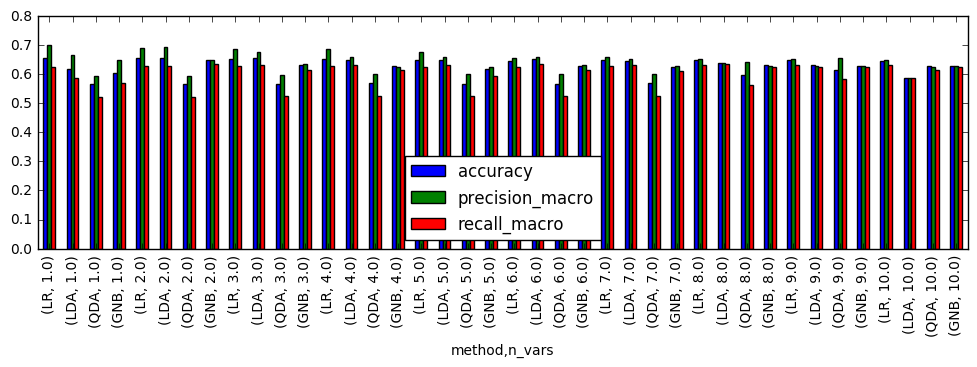

In [57]:
result.plot.bar(x=['method','n_vars'],y=['accuracy','precision_macro','recall_macro'],figsize=(12, 3))

In [41]:
len(y[y=='DOWN'])/len(y)

0.5493068142850145

# Feature Selection

# Naive Bayesian

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y,test_size=0.33, random_state = 0)

gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# creating a confusion matrix
cm = metrics.confusion_matrix(y_test, gnb_predictions)
print(cm)

dict_score = {}
scoring = ['accuracy','precision_weighted','recall_weighted']
for score in scoring:
    scores = cross_val_score(gnb, X, y, cv=10, scoring=score)
    dict_score[score] = np.mean(scores)
    
print(dict_score)

[[297   8   1 111  37   0 114  63   0   5]
 [199  22   1 278  73   0  61 124   5  69]
 [  3   0   0   5   1   0   0   0   0   2]
 [208   4   0 274  59   0 197  14   0  14]
 [175   3   0 241 130   0  57  27   0  29]
 [ 15   2   0  24   8   0  18   1   0   1]
 [  5   0   0   4   1   0  46   0   0   0]
 [ 71   4   0  20   5   0   7 198   1  31]
 [  0   0   0   0   0   0   5   3   4   0]
 [ 53   5   0  90  26   0  11  71   0  50]]


c:\users\rocku\anaconda64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\rocku\anaconda64\lib\site-packages\skle

{'accuracy': 0.13487828643968708, 'precision_weighted': 0.28903418282356924, 'recall_weighted': 0.13487828643968708}


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y2,test_size=0.33, random_state = 0)

gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
accuracy = gnb.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = metrics.confusion_matrix(y_test, gnb_predictions)
print(cm)

dict_score = {}
scoring = ['accuracy','precision_weighted','recall_weighted']
for score in scoring:
    scores = cross_val_score(gnb, X, y2, cv=10, scoring=score)
    dict_score[score] = np.mean(scores)
    
print(dict_score)

0.7844614784981161
[[5607  226]
 [1433  431]]
{'accuracy': 0.7792752350702677, 'recall_weighted': 0.7792752350702677, 'precision_weighted': 0.7583755131525948}


# Multinomial Logistic regression

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y,test_size=0.33, random_state = 0)

mul_lr = LogisticRegression(multi_class='ovr')
mul_lr.fit(X_train, y_train)

mul_lr_predictions = mul_lr.predict(X_test)
accuracy = mul_lr.score(X_test, y_test)
print(accuracy)
cm = metrics.confusion_matrix(y_test, mul_lr_predictions)
print(cm)

dict_score = {}
scoring = ['accuracy','precision_macro','recall_macro']
for score in scoring:
    scores = cross_val_score(mul_lr, X, y, cv=10, scoring=score)
    dict_score[score] = np.mean(scores)
    
print(dict_score)

0.327282579247
[[189 133   0 183 109   0   0  22   0   0]
 [ 77 299   0 247 137   0   0  72   0   0]
 [  2   4   0   5   0   0   0   0   0   0]
 [104 157   0 395 111   0   0   3   0   0]
 [ 43 123   0 257 239   0   0   0   0   0]
 [  6  10   0  43  10   0   0   0   0   0]
 [  1   0   0  49   6   0   0   0   0   0]
 [ 35 186   0  16  15   0   0  85   0   0]
 [  0   0   0   5   0   0   0   7   0   0]
 [ 23 168   0  53  36   0   0  25   0   1]]


KeyboardInterrupt: 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y2,test_size=0.33, random_state = 0)

mul_lr = LogisticRegression(multi_class='ovr')
mul_lr.fit(X_train, y_train)

mul_lr_predictions = mul_lr.predict(X_test)
accuracy = mul_lr.score(X_test, y_test)
print(accuracy)
cm = metrics.confusion_matrix(y_test, mul_lr_predictions)
print(cm)

dict_score = {}
scoring = ['accuracy','precision','recall']
for score in scoring:
    scores = cross_val_score(mul_lr, X, y2, cv=10, scoring=score)
    dict_score[score] = np.mean(scores)
    
print(dict_score)

NameError: name 'y2' is not defined

# LDA

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state = 0)

lda_model = LinearDiscriminantAnalysis(solver='lsqr').fit(X_train, y_train)
LDA_predictions = lda_model.predict(X_test)

accuracy = lda_model.score(X_test, y_test)
print(accuracy)
cm = metrics.confusion_matrix(y_test, LDA_predictions)
print(cm)

dict_score = {}
scoring = ['accuracy','precision_macro','recall_macro']
for score in scoring:
    scores = cross_val_score(lda_model, X, y, cv=10, scoring=score)
    dict_score[score] = np.mean(scores)
    
print(dict_score)

0.387157951775
[[253  64   2 174  98   0   8  35   1   1]
 [100 202   3 268 141   0  21  40   5  52]
 [  7   4   0   0   0   0   0   0   0   0]
 [172  72   1 383  91   3  38   4   2   4]
 [ 67  56   2 256 266   0  13   2   0   0]
 [  9   1   0  35  11   0  11   2   0   0]
 [  1   5   0  23   5   0  22   0   0   0]
 [ 65  24   1  18   3   0   0 220   0   6]
 [  0   0   0   5   0   0   0   0   7   0]
 [ 49  74   1  57  32   0   2  14   1  76]]


c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', a

{'accuracy': 0.36322228864431899, 'recall_macro': 0.3126563480639995, 'precision_macro': 0.30809044873484642}


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y2,test_size=0.33, random_state = 0)

lda_model = LinearDiscriminantAnalysis(solver='lsqr').fit(X_train, y_train)
LDA_predictions = lda_model.predict(X_test)

accuracy = lda_model.score(X_test, y_test)
print(accuracy)
cm = metrics.confusion_matrix(y_test, LDA_predictions)
print(cm)

dict_score = {}
scoring = ['accuracy','precision','recall']
for score in scoring:
    scores = cross_val_score(lda_model, X, y2, cv=10, scoring=score)
    dict_score[score] = np.mean(scores)
    
print(dict_score)

NameError: name 'y2' is not defined

# QDA

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state = 0)

qda_model = QuadraticDiscriminantAnalysis(store_covariances=True).fit(X_train, y_train)
QDA_predictions = qda_model.predict(X_test)

accuracy = qda_model.score(X_test, y_test)
print(accuracy)
cm = metrics.confusion_matrix(y_test, QDA_predictions)
print(cm)

dict_score = {}
scoring = ['accuracy','precision_macro','recall_macro']
for score in scoring:
    scores = cross_val_score(qda_model, X, y, cv=10, scoring=score)
    dict_score[score] = np.mean(scores)
    
print(dict_score)

c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
c:\users\rock

0.993768626389
[[636   0   0   0   0   0   0   0   0   0]
 [  0 832   0   0   0   0   0   0   0   0]
 [  0   0   0   0  11   0   0   0   0   0]
 [  0   0   0 770   0   0   0   0   0   0]
 [  0   0   0   0 662   0   0   0   0   0]
 [  0   0   0   0   0  69   0   0   0   0]
 [  0   0   0   0   0   0  56   0   0   0]
 [  0   0   0   0   0   0   0 337   0   0]
 [  0   0   0   0  12   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 306]]


c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\rocku\anaconda64\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
c:\users\rock

{'accuracy': 0.0023243133250216929, 'recall_macro': 0.10000000000000001, 'precision_macro': 0.00023243133250216936}


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y2,test_size=0.33, random_state = 0)

qda_model = QuadraticDiscriminantAnalysis(store_covariances=True).fit(X_train, y_train)
QDA_predictions = qda_model.predict(X_test)

accuracy = qda_model.score(X_test, y_test)
print(accuracy)
cm = metrics.confusion_matrix(y_test, QDA_predictions)
print(cm)

dict_score = {}
scoring = ['accuracy','precision','recall']
for score in scoring:
    scores = cross_val_score(qda_model, X, y2, cv=10, scoring=score)
    dict_score[score] = np.mean(scores)
    
print(dict_score)

NameError: name 'y2' is not defined

# Original Data

In [3]:
data1 = pd.read_csv('stat_data.csv', thousands=',',encoding = "EUC-KR")
data2 = pd.read_csv('final!!!.csv', thousands=',', encoding = "EUC-KR")

cols_to_use = data1.columns - data2.columns
data_merged = pd.merge(data2, data1[cols_to_use],how='inner',left_on=['code','year'], right_on=['Symbol','Year'])
data_merged = data_merged.drop(['code','year'],axis=1)

c:\users\rocku\anaconda64\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [4]:
data_merged.set_index(['Symbol','Year'],inplace=True)
data_merged['next_roe'] = data_merged.groupby(level=0)['roe'].shift(-1)
data_merged['updown'] = np.where(data_merged['roe'] < data_merged['next_roe'], 1,0)
data_merged = data_merged[~data_merged.isin([np.nan, np.inf, -np.inf]).any(1)]

In [5]:
data_merged = data_merged.dropna(axis=0, how='any')
data_merged = data_merged[~ pd.isnull(data_merged)]

In [7]:
data_merged.head(10)

total_assets  total_liability  shorterm_debt  longterm_debt  \
Symbol  Year                                                                
A005930 2000  2.689505e+10     1.104022e+10   8.608449e+09   2.093751e+09   
        2001  2.791941e+10     9.573928e+09   6.314242e+09   2.131415e+09   
        2002  3.443960e+10     8.873158e+09   7.590014e+09   1.710645e+09   
        2003  3.920338e+10     9.544782e+09   9.191898e+09   5.970080e+08   
        2004  4.381654e+10     9.582520e+09   8.720903e+09   6.552310e+08   
        2005  5.053877e+10     1.012915e+10   8.345275e+09   2.536885e+09   
        2006  5.780913e+10     1.174685e+10   9.635015e+09   2.976529e+09   
        2007  6.522525e+10     1.313809e+10   1.080235e+10   2.862282e+09   
        2008  7.251922e+10     1.403518e+10   1.172136e+10   2.684368e+09   
        2009  1.121798e+11     4.075564e+10   3.420442e+10   4.930163e+09   

              total_equity         sales  cost_of_goods_sold    labor_cost  \
Symbol  Year                                                                 
A005930 2000  1.619285e+10  3.428375e+10        2.199338e+10  5.181662e+08   
        2001  1.947375e+10  3.238037e+10        2.451473e+10  5.800693e+08   
        2002  2.513894e+10  3.981311e+10        2.630056e+10  7.463130e+08   
        2003  2.941448e+10  4.358202e+10        2.951875e+10  7.356010e+08   
        2004  3.444041e+10  5.763236e+10        3.727969e+10  9.576620e+08   
        2005  3.965661e+10  5.745767e+10        4.015815e+10  8.980760e+08   
        2006  4.519758e+10  5.897276e+10        4.235975e+10  8.413400e+08   
        2007  5.156062e+10  6.317597e+10        4.684655e+10  9.187020e+08   
        2008  5.811349e+10  7.295299e+10        5.538060e+10  9.551810e+08   
        2009  7.304520e+10  1.363237e+11        9.459486e+10  2.732159e+09   

              advertisement_cost  selling_cost   ...    \
Symbol  Year                                     ...     
A005930 2000        6.511878e+08  9.383357e+08   ...     
        2001        7.155440e+08  1.411229e+09   ...     
        2002        9.671370e+08  9.573790e+08   ...     
        2003        9.813460e+08  1.192303e+09   ...     
        2004        6.550300e+08  1.656797e+09   ...     
        2005        1.069387e+09  1.710866e+09   ...     
        2006        1.515037e+09  1.532289e+09   ...     
        2007        1.446819e+09  1.763682e+09   ...     
        2008        2.574215e+09  2.788310e+09   ...     
        2009        3.173900e+09  9.191900e+09   ...     

              related_investment_assets  retained_earnings  retirement_pay  \
Symbol  Year                                                                 
A005930 2000               0.000000e+00       1.075443e+10      35441860.0   
        2001               0.000000e+00       1.335299e+10      49054259.0   
        2002               6.548942e+09       2.032072e+10      77776000.0   
        2003               6.610632e+09       2.440971e+10      51003000.0   
        2004               8.353211e+09       3.057504e+10      61690000.0   
        2005               8.891880e+09       3.736589e+10      81736000.0   
        2006               1.126508e+10       4.435677e+10      86522000.0   
        2007               1.500846e+10       5.096268e+10     103584000.0   
        2008               2.039019e+10       5.541605e+10      88954000.0   
        2009               7.334705e+09       7.106525e+10     113936000.0   

                  rnd_cost   self_equity  st_fin_assets   st_fin_liab  \
Symbol  Year                                                            
A005930 2000  1.335400e+09 -9.622479e+08   2.093151e+09  2.369431e+09   
        2001  1.552989e+09 -9.622479e+08   1.837655e+09  9.709419e+08   
        2002  1.759791e+09 -2.462091e+09   6.019915e+09  4.389860e+08   
        2003  2.017298e+09 -3.457834e+09   6.773397e+09  1.045211e+09   
        2004  2.687418e+09 -4.159639e+09   6.539900e+09  0.000000e+00   
       

In [17]:
data_merged.columns

Index(['average_total_assets', 'average_total_equity', 'sales', 'roe',
       'dividends_to_assets', 'cash_and_cash_equivalents_to_assets',
       'short_term_financial_assets_to_assets',
       'accounts_and_other_receivables_to_assets', 'inventories_to_assets',
       'non_current_assets_as_held_for_sale_to_assets',
       'long_term_financial_assets_to_assets', 'tangible_assets_to_assets',
       'land_to_assets', 'facility_assets_to_assets',
       'other_tangible_assets_to_assets',
       'assets_under_construction_to_assets', 'intangible_assets_to_assets',
       'goodwill_to_assets', 'long_term_sales_and_other_receivables_to_assets',
       'accounts_and_other_payables_to_assets',
       'short_term_borrowings_to_assets',
       'current_portion_of_long_term_debts_to_assets',
       'short_term_provisions_to_assets', 'general_bonds_to_assets',
       'convertible_bonds_to_assets', 'bonds_with_warrents_to_assets',
       'long_term_borrowings_to_assets',
       'financial_lease_l

In [6]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# data_norm = data_merged[['total_assets', 'total_liability', 'shorterm_debt', 'longterm_debt',
#                         'total_equity', 'sales', 'cost_of_goods_sold', 'labor_cost',
#                         'advertisement_cost', 'selling_cost', 'administrative cost',
#                         'dividends', 'net_income', 'sales_growth', 'roe',
#                         'cost_of_goods_sold_growth', 'labor_cost_growth',
#                         'advertisement_cost_growth', 'selling_cost_growth',
#                         'administrative cost_growth', 'dividends_growth', 'stdebt_ratio',
#                         'ltdebt_ratio', 'debt_ratio', 'shorterm_debt_growth',
#                         'longterm_debt_growth', 'cost_of_goods_sold_ratio', 'labor_cost_ratio',
#                         'advertisement_cost_ratio', 'selling_cost_ratio',
#                         'administrative cost_ratio', 'acc_liab', 'acc_receivble',
#                         'ad_cost', 'admin_cost', 'afs_fin_assets', 'borrowing_cost', 'cash_eq',
#                         'cash_flow', 'cogs', 'cont_equity', 'cont_net_income', 'dividends.1',
#                         'facility', 'ing_assets', 'interest_expense', 'interest_revenue',
#                         'inventory', 'land', 'lt_acc_receivable', 'lt_fin_assets',
#                         'lt_fin_liab', 'other_employee_benefits?', 'payward',
#                         'related_investment_assets', 'retained_earnings', 'retirement_pay',
#                         'rnd_cost', 'self_equity', 'st_fin_assets', 'st_fin_liab',
#                         'uncurrent_assets']]
# np_scaled = min_max_scaler.fit_transform(data_norm)
# X = pd.DataFrame(np_scaled)

In [24]:
dataf = data_merged[data_merged['net_income'] < 0]

data_dummy = pd.get_dummies(dataf['sector'])
data_merged2 = pd.merge(dataf.reset_index(),data_dummy.reset_index(), how='inner', on=['Symbol','Year'])
data = data_merged2

In [25]:
X = data.reset_index().drop(['Symbol','Year','sector','updown','next_roe'], axis=1)
y = data['updown'].astype(np.float64)

clf_l1_LR = LogisticRegression(C=0.1, penalty='l1', tol=0.01)
clf_l1_LR.fit(np.array(X), np.array(y))
clf_l1_LR.score(np.array(X), np.array(y))

0.76211782252050708

In [10]:
data_origin = data.reset_index().drop(['Symbol','Year','sector','updown'], axis=1)
score = []
for i in range(5):
    print('STEP', str(i*12))
    X = data_origin.iloc[:,:i*12+1]
    y = data_merged['updown'].astype(np.float64)

    clf_l1_LR = LogisticRegression(C=0.1, penalty='l1', tol=0.01)
    clf_l1_LR.fit(np.array(X), np.array(y))
    score.append(clf_l1_LR.score(np.array(X), np.array(y)))
    
print(score)

STEP 0
STEP 12
STEP 24


KeyboardInterrupt: 

In [107]:
print(len(data[data['updown'] == 1]), len(data[data['updown'] == 0]))

4906 6252


In [108]:
scores = cross_val_score(clf_l1_LR, X, y, cv=10, scoring='f1_macro')
print(scores)
np.mean(scores)

KeyboardInterrupt: 

In [328]:
data['predicted'] = clf_l1_LR.predict(np.array(X))
data.to_csv('predicted2.csv')

# SVM

In [ ]:
from sklearn import svm

clf_l1_SVM = svm.SVC(C=0.84, tol=0.001, verbose=False, kernel='rbf')
clf_l1_SVM.fit(np.array(X), np.array(y))
clf_l1_SVM.score(np.array(X), np.array(y))

In [ ]:
scores = cross_val_score(clf_l1_SVM, X, y, cv=10)

# NNet

In [337]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras import optimizers
from keras.regularizers

SyntaxError: invalid syntax (<ipython-input-337-b8883e3d40e4>, line 5)

In [338]:
X.shape

(9817, 64)

In [378]:
input_length = 64

input_words = Input(shape=(input_length,))
l1 = Dense(200, activation='relu')(input_words)
l2 = Dense(100, activation='relu')(l1)
l3 = Dense(50, activation='relu')(l2)
l4 = Dense(10, activation='relu')(l3)
ouput = Dense(1, activation='sigmoid')(l4)

nn_model = Model(input_words, ouput)
nn_model.compile(loss='mape', optimizer='adam', metrics=['accuracy'])

total_samples = X.shape[0]
train_samples = int(round(7*total_samples/10,0))
x_train = X.values[:train_samples]
y_train = y.values[:train_samples]
x_test = X.values[train_samples+1:]
y_test = y.values[train_samples+1:]

nn_model.fit(X.values, y.values,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

Train on 7853 samples, validate on 1964 samples
Epoch 1/10
7853/7853 [==============================] - 1s 147us/step - loss: 5093603.4193 - acc: 0.9124 - val_loss: 2036674.1589 - val_acc: 0.8569
Epoch 2/10
7853/7853 [==============================] - 0s 24us/step - loss: 5093603.3411 - acc: 0.9124 - val_loss: 2036674.1589 - val_acc: 0.8569
Epoch 3/10
7853/7853 [==============================] - 0s 25us/step - loss: 5093603.4654 - acc: 0.9124 - val_loss: 2036674.1589 - val_acc: 0.8569
Epoch 4/10
7853/7853 [==============================] - 0s 24us/step - loss: 5093603.3893 - acc: 0.9124 - val_loss: 2036674.1589 - val_acc: 0.8569
Epoch 5/10
7853/7853 [==============================] - 0s 25us/step - loss: 5093603.2630 - acc: 0.9124 - val_loss: 2036674.1589 - val_acc: 0.8569
Epoch 6/10
7853/7853 [==============================] - 0s 28us/step - loss: 5093603.3623 - acc: 0.9124 - val_loss: 2036674.1589 - val_acc: 0.8569
Epoch 7/10
7853/7853 [==============================] - 0s 27us/step 

In [379]:
nn_model.evaluate(x=X.values,y=y)

9817/9817 [==============================] - 0s 44us/step


[4482030.487929103, 0.90129367426892359]